### Importation des bibliothèques

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv

### Importation du data et Création du graphe

In [48]:
data_fb = pd.read_csv('C:\\Users\\Ha\\Documents\\Tp sc.donnes\\Analyse_Networkx\\Relation_fb.csv')  
data_fb.head()


,From,To
0,Ahmed,Jawad
1,Ahmed,Sufian
2,Ahmed,Nacir
3,Ahmed,Otman
4,Ahmed,Ayman


### Création du Graphe

In [49]:
fb = nx.from_pandas_edgelist(data_fb, source="From",target="To")

###  Caractérisation du réseau

In [50]:
# Calcul du nombre de nœuds et d'arêtes
num_nodes = fb.number_of_nodes()
num_edges = fb.number_of_edges()
print("Nombre de nœuds :", num_nodes)
print("Nombre d'arêtes :", num_edges)

Nombre de nœuds : 24
Nombre d'arêtes : 83


In [51]:
#Manipulation des nœuds et des arêtes
noeuds = fb.nodes()
aretes = fb.edges()
degrees = fb.degree()
print('Tous les nœuds du graphe', noeuds)
print('Toutes les arêtes du graphe',aretes)
# Calcul des degrés des nœuds
degrees = fb.degree()

# Tri des résultats selon le degré
sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

# Affichage des résultats triés
for node, degree in sorted_degrees:
    print(f" {node}: Degré {degree}")
    


Tous les nœuds du graphe ['Ahmed', 'Jawad', 'Sufian', 'Nacir', 'Otman', 'Ayman', 'Achraf', 'Abdo', 'Bilal', 'Med', 'Amin', 'Ismail', 'Ibrahim', 'Sofian', 'Simo', 'Nizar', 'Said', 'Yassin', 'Chakib', 'Anas', 'Ziko', 'Nabil', 'Jamal', 'Hafid']
Toutes les arêtes du graphe [('Ahmed', 'Jawad'), ('Ahmed', 'Sufian'), ('Ahmed', 'Nacir'), ('Ahmed', 'Otman'), ('Ahmed', 'Ayman'), ('Ahmed', 'Achraf'), ('Ahmed', 'Abdo'), ('Ahmed', 'Bilal'), ('Ahmed', 'Med'), ('Ahmed', 'Amin'), ('Ahmed', 'Ismail'), ('Ahmed', 'Ibrahim'), ('Ahmed', 'Sofian'), ('Ahmed', 'Simo'), ('Ahmed', 'Nizar'), ('Ahmed', 'Said'), ('Ahmed', 'Yassin'), ('Ahmed', 'Chakib'), ('Ahmed', 'Anas'), ('Ahmed', 'Ziko'), ('Ahmed', 'Nabil'), ('Ahmed', 'Jamal'), ('Ahmed', 'Hafid'), ('Jawad', 'Bilal'), ('Jawad', 'Sufian'), ('Jawad', 'Nacir'), ('Jawad', 'Otman'), ('Sufian', 'Nacir'), ('Sufian', 'Otman'), ('Nacir', 'Otman'), ('Ayman', 'Achraf'), ('Ayman', 'Abdo'), ('Ayman', 'Med'), ('Ayman', 'Bilal'), ('Achraf', 'Abdo'), ('Achraf', 'Med'), ('Achraf'

### Visualisation

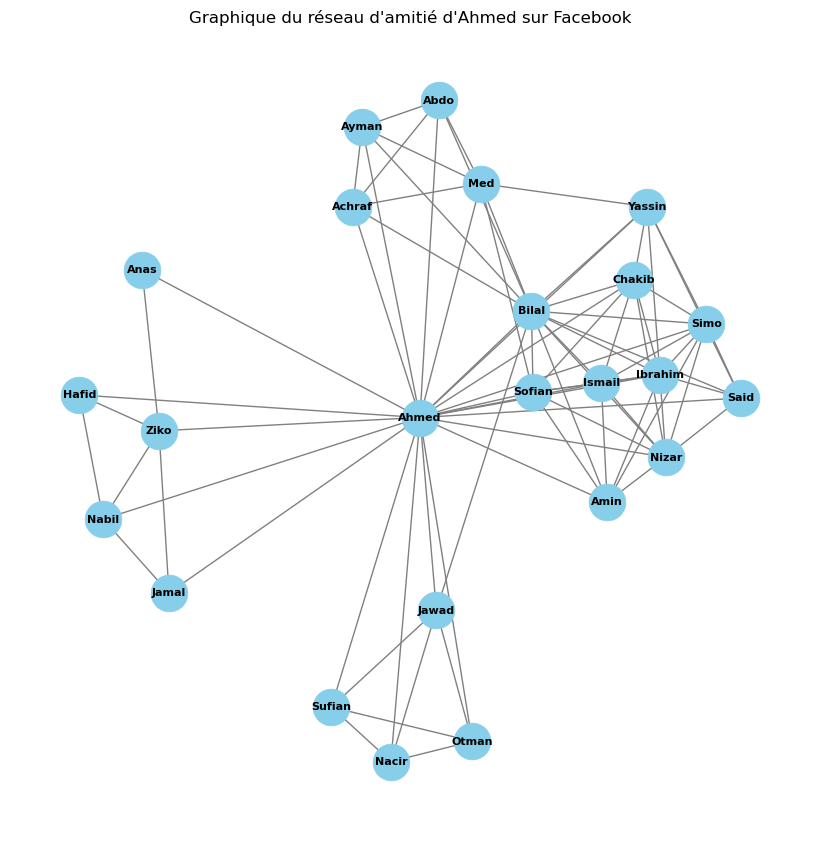

In [52]:
plt.figure(figsize=(8, 8))

nx.draw(fb, with_labels=True, font_size=8, node_size=700, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)
plt.title("Graphique du réseau d'amitié d'Ahmed sur Facebook")
plt.show()

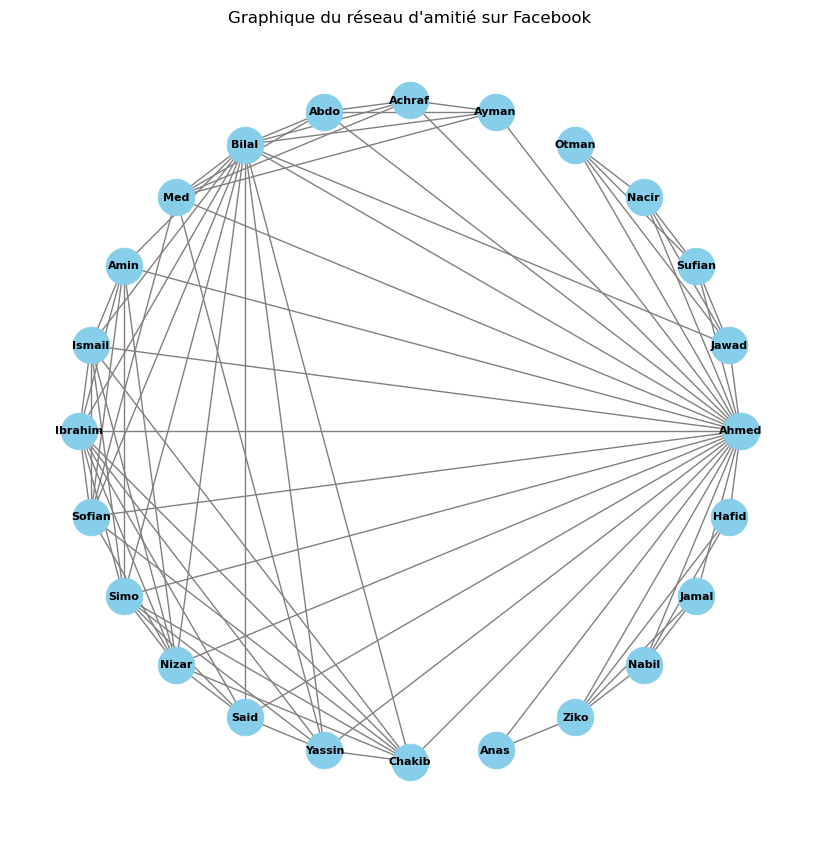

In [53]:
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(fb)
nx.draw(fb, pos, with_labels=True, font_size=8, node_size=700, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)
plt.title("Graphique du réseau d'amitié sur Facebook")
plt.show()

c:\Users\Ha\anaconda3\Lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


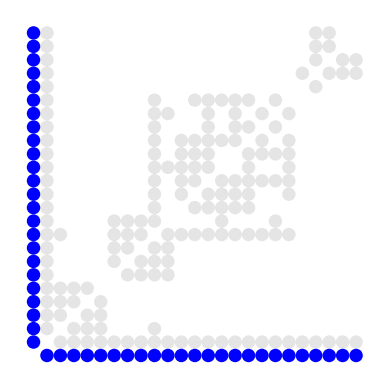

In [54]:
matrix_amis = nv.MatrixPlot(fb)
plt.show()

### Amis importants

#### Degré de Voisins

Nombre de voisins de tous les nœuds :
Ahmed: 23
Jawad: 5
Sufian: 4
Nacir: 4
Otman: 4
Ayman: 5
Achraf: 5
Abdo: 5
Bilal: 15
Med: 7
Amin: 7
Ismail: 8
Ibrahim: 10
Sofian: 8
Simo: 9
Nizar: 9
Said: 6
Yassin: 7
Chakib: 8
Anas: 2
Ziko: 5
Nabil: 4
Jamal: 3
Hafid: 3


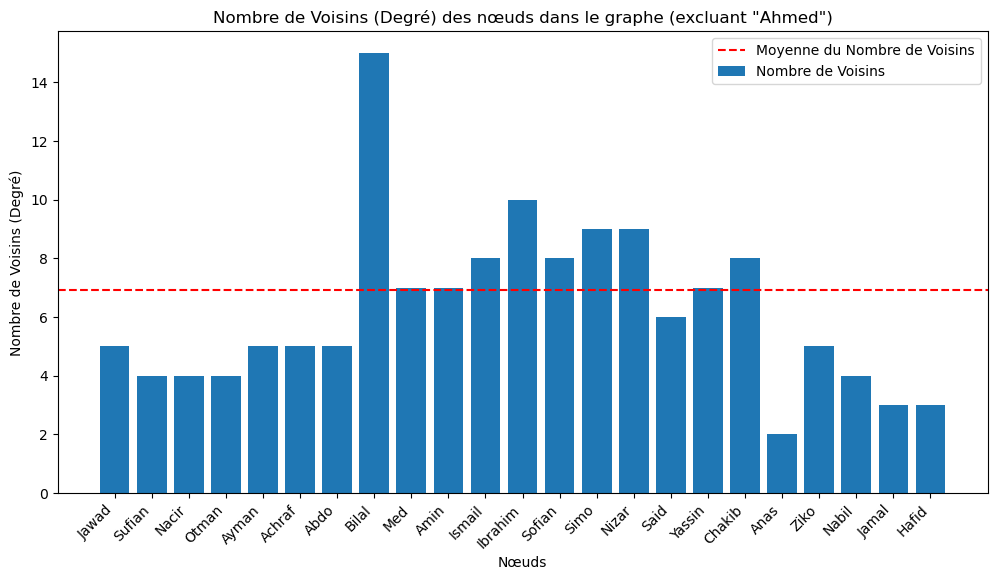

In [55]:

# Calcul du degré de tous les voisins 
degre_voisins = {node: len(list(fb.neighbors(node))) for node in fb.nodes()}



# Calcul de la moyenne du nombre de voisins
moyenne_degre = sum(degre_voisins.values()) / len(degre_voisins)

# Affichage du nombre de voisins de tous les nœuds (excluant "Ahmed")
print("Nombre de voisins de tous les nœuds :")
for node, degree in degre_voisins.items():
    print(f"{node}: {degree}")

# Exclure le nœud "Ahmed" de l'affichage
if "Ahmed" in degre_voisins:
    del degre_voisins["Ahmed"]
    
# Affichage de l'histogramme avec la barre de moyenne
plt.figure(figsize=(12, 6))
plt.bar(degre_voisins.keys(), degre_voisins.values(), label='Nombre de Voisins')
plt.axhline(y=moyenne_degre, color='r', linestyle='--', label='Moyenne du Nombre de Voisins')
plt.xlabel('Nœuds')
plt.ylabel('Nombre de Voisins (Degré)')
plt.title('Nombre de Voisins (Degré) des nœuds dans le graphe (excluant "Ahmed")')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


#### Degré de centralité

Degrés de centralité de tous les nœuds:
Ahmed: 1.0
Jawad: 0.21739130434782608
Sufian: 0.17391304347826086
Nacir: 0.17391304347826086
Otman: 0.17391304347826086
Ayman: 0.21739130434782608
Achraf: 0.21739130434782608
Abdo: 0.21739130434782608
Bilal: 0.6521739130434783
Med: 0.30434782608695654
Amin: 0.30434782608695654
Ismail: 0.34782608695652173
Ibrahim: 0.43478260869565216
Sofian: 0.34782608695652173
Simo: 0.3913043478260869
Nizar: 0.3913043478260869
Said: 0.2608695652173913
Yassin: 0.30434782608695654
Chakib: 0.34782608695652173
Anas: 0.08695652173913043
Ziko: 0.21739130434782608
Nabil: 0.17391304347826086
Jamal: 0.13043478260869565
Hafid: 0.13043478260869565


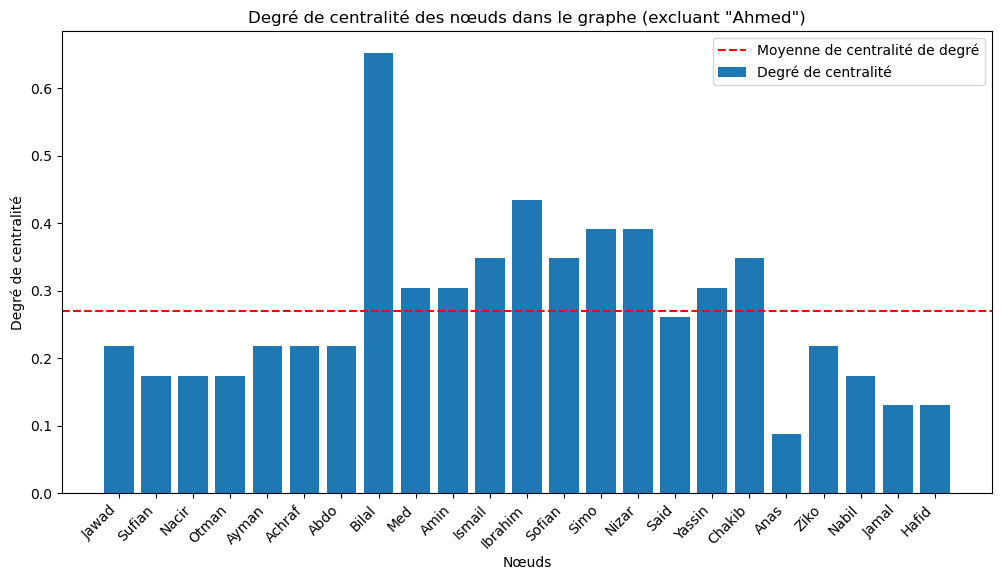

In [56]:

# Calcul du degré de centralité
centralite_degre = nx.degree_centrality(fb)

# Affichage des degrés de tous les nœuds
print("Degrés de centralité de tous les nœuds:")
for node, degree in centralite_degre.items():
    print(f"{node}: {degree}")

# Exclure le nœud "Ahmed" de l'affichage
if "Ahmed" in  centralite_degre:
    del centralite_degre["Ahmed"]

# Calcul de la moyenne de la centralité de degré
moyenne_centralite = sum(centralite_degre.values()) / len(centralite_degre)

# Affichage de l'histogramme avec la droite de moyenne
plt.figure(figsize=(12, 6))
plt.bar(centralite_degre.keys(), centralite_degre.values(), label='Degré de centralité')
plt.axhline(y=moyenne_centralite, color='r', linestyle='--', label='Moyenne de centralité de degré')
plt.xlabel('Nœuds')
plt.ylabel('Degré de centralité')
plt.xticks(rotation=45, ha='right')
plt.title('Degré de centralité des nœuds dans le graphe (excluant "Ahmed")')
plt.legend()
plt.show()


#### Degré d'intermédiarité

Degrés d'intermédiarité de tous les nœuds:
Ahmed: 0.6143045360436665
Jawad: 0.005928853754940711
Sufian: 0.0
Nacir: 0.0
Otman: 0.0
Ayman: 0.0
Achraf: 0.0
Abdo: 0.0
Bilal: 0.09124788255223039
Med: 0.008695652173913044
Amin: 0.000564652738565782
Ismail: 0.001129305477131564
Ibrahim: 0.007585168454733671
Sofian: 0.006493506493506493
Simo: 0.005241859589685677
Nizar: 0.004357236965932618
Said: 0.0006587615283267456
Yassin: 0.005270092226613965
Chakib: 0.002804441934876717
Anas: 0.0
Ziko: 0.007246376811594201
Nabil: 0.0013175230566534913
Jamal: 0.0
Hafid: 0.0


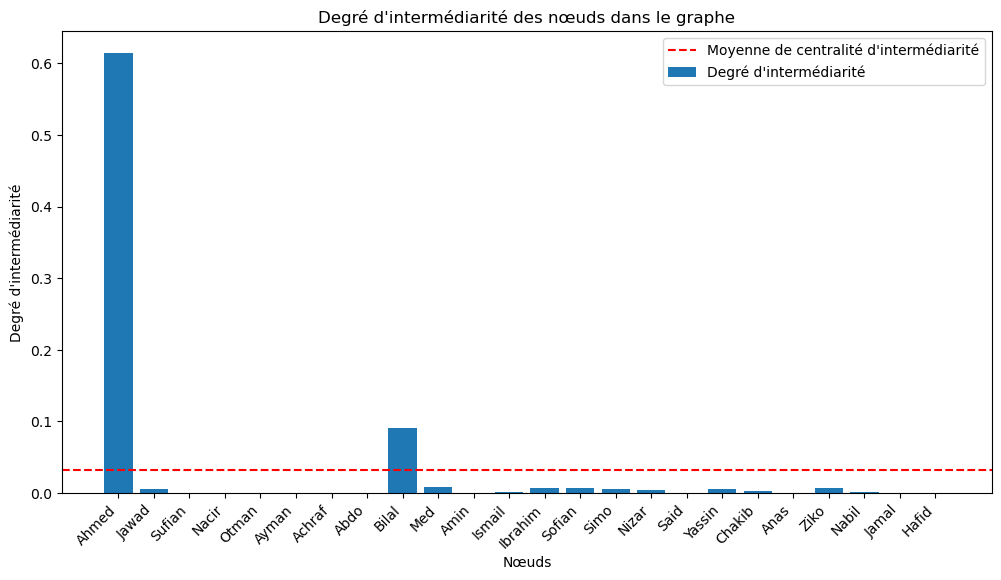

In [57]:
# Calcul de la centralité d'intermédiarité
intermediarite = nx.betweenness_centrality(fb)

# Affichage des degrés d'intermédiarité de tous les nœuds
print("Degrés d'intermédiarité de tous les nœuds:")
for node, betweenness in intermediarite.items():
    print(f"{node}: {betweenness}")

# Calcul de la moyenne de la centralité d'intermédiarité
moyenne_intermediarite = sum(intermediarite.values()) / len(intermediarite)

# Affichage de l'histogramme avec la droite de moyenne
plt.figure(figsize=(12, 6))
plt.bar(intermediarite.keys(), intermediarite.values(), label="Degré d'intermédiarité")
plt.axhline(y=moyenne_intermediarite, color='r', linestyle='--', label="Moyenne de centralité d'intermédiarité")
plt.xlabel('Nœuds')
plt.ylabel("Degré d'intermédiarité")
plt.title("Degré d'intermédiarité des nœuds dans le graphe")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


### Trouver les cliques

In [58]:
cliques = list(nx.find_cliques(fb))

# Afficher les cliques 
for i, clique in enumerate(cliques, 1):
    print(f"Clique {i}: {clique}")



Clique 1: ['Ahmed', 'Nabil', 'Ziko', 'Jamal']
Clique 2: ['Ahmed', 'Nabil', 'Ziko', 'Hafid']
Clique 3: ['Ahmed', 'Bilal', 'Jawad']
Clique 4: ['Ahmed', 'Bilal', 'Ayman', 'Abdo', 'Achraf', 'Med']
Clique 5: ['Ahmed', 'Bilal', 'Ibrahim', 'Yassin', 'Simo', 'Said']
Clique 6: ['Ahmed', 'Bilal', 'Ibrahim', 'Yassin', 'Simo', 'Chakib']
Clique 7: ['Ahmed', 'Bilal', 'Ibrahim', 'Nizar', 'Said', 'Simo']
Clique 8: ['Ahmed', 'Bilal', 'Ibrahim', 'Nizar', 'Ismail', 'Sofian', 'Amin']
Clique 9: ['Ahmed', 'Bilal', 'Ibrahim', 'Nizar', 'Ismail', 'Sofian', 'Chakib']
Clique 10: ['Ahmed', 'Bilal', 'Ibrahim', 'Nizar', 'Ismail', 'Simo', 'Amin']
Clique 11: ['Ahmed', 'Bilal', 'Ibrahim', 'Nizar', 'Ismail', 'Simo', 'Chakib']
Clique 12: ['Ahmed', 'Bilal', 'Med', 'Sofian']
Clique 13: ['Ahmed', 'Bilal', 'Med', 'Yassin']
Clique 14: ['Ahmed', 'Nacir', 'Jawad', 'Sufian', 'Otman']
Clique 15: ['Ahmed', 'Ziko', 'Anas']


### Sous-graphes d'Amis

#### Sous-graphe 1 : Amis Connus dans l'Université

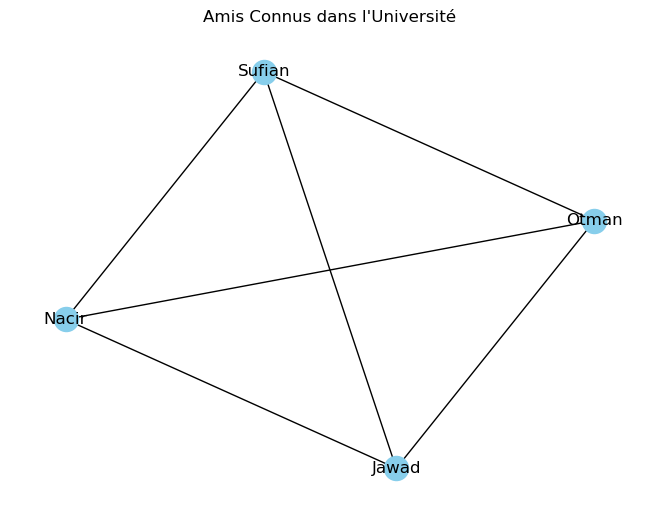

In [59]:
amis_univ = ['Jawad', 'Nacir', 'Sufian', 'Otman']

# Créer un sous-graphe 
sous_graphe_univ = fb.subgraph(amis_univ)

# Dessiner le sous-graphe
nx.draw(sous_graphe_univ, with_labels=True, node_color='skyblue', node_size=300)
plt.title("Amis Connus dans l'Université")

# Afficher le sous-graphe
plt.show()

#### Sous-graphe 2 : Amis des Voisins

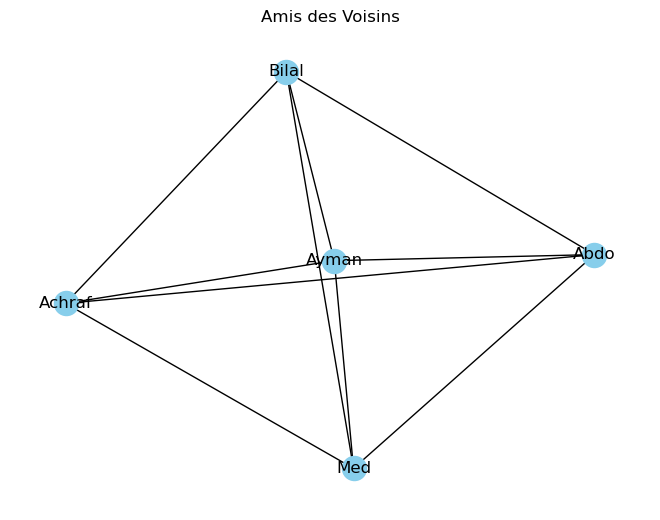

In [60]:
voisins = ['Abdo', 'Ayman', 'Med', 'Bilal', 'Achraf']


sous_graphe_voisins = fb.subgraph(voisins)
nx.draw(sous_graphe_voisins, with_labels=True, node_color='skyblue', node_size=300)
plt.title("Amis des Voisins")

plt.show()

#### Sous-graphe 3 : Amis Membres de Famille

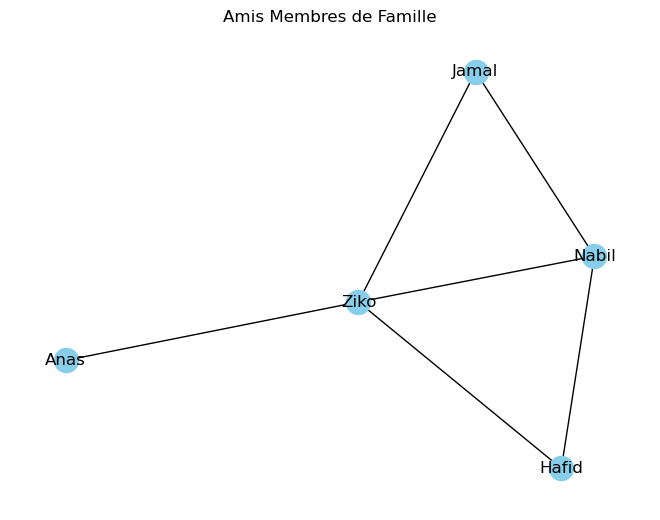

In [61]:
famille  = ['Anas', 'Hafid', 'Nabil', 'Jamal', 'Ziko']


sous_graphe_famille = fb.subgraph(famille)

# Dessiner le sous-graphe
nx.draw(sous_graphe_famille, with_labels=True, node_color='skyblue', node_size=300)

# Titre du sous-graphe
plt.title("Amis Membres de Famille")

# Afficher le sous-graphe
plt.show()

###  Système de recommandation d'amitié (Triangles Ouverts)

In [62]:

from itertools import combinations
from collections import defaultdict

# Initialisation du dictionnaire recommandé
recommended = defaultdict(int)

# Itération sur tous les nœuds dans le graphe 
for n in fb.nodes():
    
    # Itération sur toutes les combinaisons possibles de relations triangulaires
    for n1, n2 in combinations(fb.neighbors(n), 2):
        
        # Vérification de l'absence d'une arête directe entre n1 et n2
        if not fb.has_edge(n1, n2):
            
            # Incrémentation du compteur de recommandation
            recommended[(n1, n2)] += 1

# Calcul de la longueur du dictionnaire
longueur_dictionnaire = len(recommended)
print(f"Le nombre des recommandation  est : {longueur_dictionnaire}")

# Affichage des recommandations pour les paires ayant au moins 2 amis en commun
for pair, count in recommended.items():
    if count >= 2:
        print(f"Recommendation pour les amis {pair}")
    else:
        continue


Le nombre des recommandation  est : 197
Recommendation pour les amis ('Jawad', 'Ayman')
Recommendation pour les amis ('Jawad', 'Achraf')
Recommendation pour les amis ('Jawad', 'Abdo')
Recommendation pour les amis ('Jawad', 'Med')
Recommendation pour les amis ('Jawad', 'Amin')
Recommendation pour les amis ('Jawad', 'Ismail')
Recommendation pour les amis ('Jawad', 'Ibrahim')
Recommendation pour les amis ('Jawad', 'Sofian')
Recommendation pour les amis ('Jawad', 'Simo')
Recommendation pour les amis ('Jawad', 'Nizar')
Recommendation pour les amis ('Jawad', 'Said')
Recommendation pour les amis ('Jawad', 'Yassin')
Recommendation pour les amis ('Jawad', 'Chakib')
Recommendation pour les amis ('Ayman', 'Amin')
Recommendation pour les amis ('Ayman', 'Ismail')
Recommendation pour les amis ('Ayman', 'Ibrahim')
Recommendation pour les amis ('Ayman', 'Sofian')
Recommendation pour les amis ('Ayman', 'Simo')
Recommendation pour les amis ('Ayman', 'Nizar')
Recommendation pour les amis ('Ayman', 'Said'